In [1]:
from lambeq import QuantumTrainer, SPSAOptimizer, Dataset, MSELoss
from pytket.extensions.qiskit import AerBackend
import numpy as np
from src.fidelity_trainer import FidelityModel, fidelity_pqc_gen

In [23]:
train_data = np.genfromtxt('src/example_train.csv', delimiter=',', dtype=None)[1:101,:]
val_data = np.genfromtxt('src/example_train.csv', delimiter=',', dtype=None)[101:,:]
train_circuits = []
train_labels = train_data[:,2]
for sentence_1, sentence_2 in train_data[:,:2]:
    train_circuits.append(fidelity_pqc_gen(sentence_1, sentence_2))
val_circuits = []
val_labels = val_data[:,2]
for sentence_1, sentence_2 in val_data[:,:2]:
    val_circuits.append(fidelity_pqc_gen(sentence_1, sentence_2))

In [24]:
def loss(predictions, labels):
    return np.mean(np.abs(predictions-labels))

In [25]:
EPOCHS=200

backend = AerBackend()
backend_config = {
    'backend': backend,
    'compilation': backend.default_compilation_pass(2),
    'shots': 2**16
}
model = FidelityModel.from_diagrams(train_circuits + val_circuits, backend_config=backend_config)
trainer = QuantumTrainer(
    model,
    loss_function=loss,
    epochs=EPOCHS,
    optimizer=SPSAOptimizer,
    optim_hyperparams={'a': 0.3, 'c': 0.06, 'A':0.01*EPOCHS},
)
train_dataset = Dataset(
        train_circuits,
        train_labels,
        batch_size=30)
val_dataset = Dataset(
        val_circuits,
        val_labels,
        shuffle=False)

trainer.fit(train_dataset, val_dataset, log_interval=12)

Epoch 12:   train/loss: 0.2814   valid/loss: 0.2566   train/time: 6m32s   valid/time: 58.88s
Epoch 24:   train/loss: 0.1380   valid/loss: 0.2237   train/time: 6m34s   valid/time: 59.50s
Epoch 36:   train/loss: 0.1453   valid/loss: 0.2123   train/time: 6m38s   valid/time: 59.92s
Epoch 48:   train/loss: 0.1956   valid/loss: 0.1810   train/time: 6m40s   valid/time: 1m1s
Epoch 60:   train/loss: 0.1583   valid/loss: 0.2044   train/time: 6m43s   valid/time: 1m1s
Epoch 72:   train/loss: 0.1282   valid/loss: 0.1875   train/time: 6m37s   valid/time: 1m1s
Epoch 84:   train/loss: 0.1069   valid/loss: 0.1743   train/time: 6m35s   valid/time: 58.75s
Epoch 96:   train/loss: 0.1647   valid/loss: 0.1809   train/time: 6m29s   valid/time: 58.69s
Epoch 108:  train/loss: 0.1628   valid/loss: 0.1856   train/time: 6m27s   valid/time: 58.35s
Epoch 120:  train/loss: 0.1143   valid/loss: 0.1858   train/time: 6m38s   valid/time: 58.22s
Epoch 132:  train/loss: 0.1068   valid/loss: 0.2041   train/time: 6m32s   va

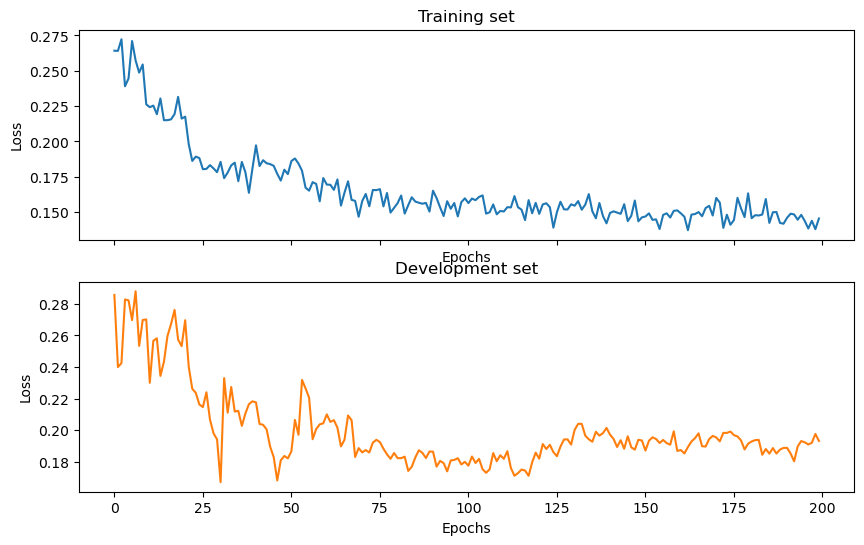

In [31]:
import matplotlib.pyplot as plt
fig, (ax_t, ax_v) = plt.subplots(2, 1, sharex=True, sharey='row', figsize=(10, 6))
ax_t.set_title('Training set')
ax_v.set_title('Development set')
ax_t.set_xlabel('Epochs')
ax_v.set_xlabel('Epochs')
ax_t.set_ylabel('Loss')
ax_v.set_ylabel('Loss')

colours = iter(plt.rcParams['axes.prop_cycle'].by_key()['color'])
ax_t.plot(trainer.train_epoch_costs, color=next(colours))
ax_v.plot(trainer.val_costs, color=next(colours))

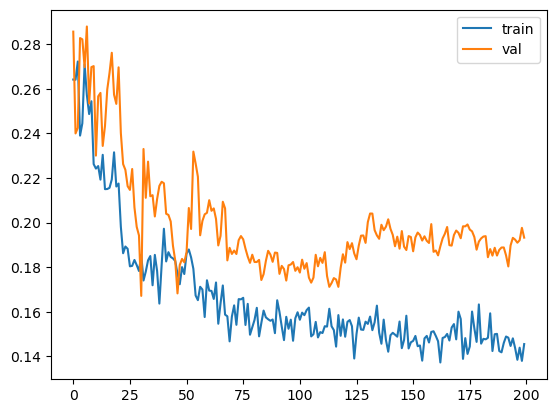

In [33]:
plt.plot(trainer.train_epoch_costs, label="train")
plt.plot(trainer.val_costs, label="val")
plt.legend()
plt.show()

In [35]:
np.savetxt("VAL_COSTS-100-train_30-val_200_epochs_a-0.3_c-0.06.csv", trainer.val_costs, delimiter=',')

In [36]:
model.save("best_fidelity_model.lt")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a_05 = np.genfromtxt('Model Training Data/30-sentences_a-0.05_c-0.06.csv', delimiter=',')
a_10 = np.genfromtxt('Model Training Data/30-sentences_a-0.1_c-0.06.csv', delimiter=',')
a_15 = np.genfromtxt('Model Training Data/30-sentences_a-0.15_c-0.06.csv', delimiter=',')
a_20 = np.genfromtxt('Model Training Data/30-sentences_a-0.2_c-0.06.csv', delimiter=',')
a_30 = np.genfromtxt('Model Training Data/30-sentences_a-0.3_c-0.06.csv', delimiter=',')
a_40 = np.genfromtxt('Model Training Data/30-sentences_a-0.4_c-0.06.csv', delimiter=',')
a_50 = np.genfromtxt('Model Training Data/30-sentences_a-0.5_c-0.06.csv', delimiter=',')
a_100 = np.genfromtxt('Model Training Data/30-sentences_a-1.0_c-0.06.csv', delimiter=',')

plt.plot(a_05, label="$a=0.05$")
plt.plot(a_10, label="$a=0.10$")
plt.plot(a_15, label="$a=0.15$")
plt.plot(a_20, label="$a=0.20$")
plt.plot(a_30, label="$a=0.30$")
plt.plot(a_40, label="$a=0.40$")
plt.plot(a_50, label="$a=0.50$")
plt.plot(a_100, label="$a=1.0$")
plt.legend()
plt.show()

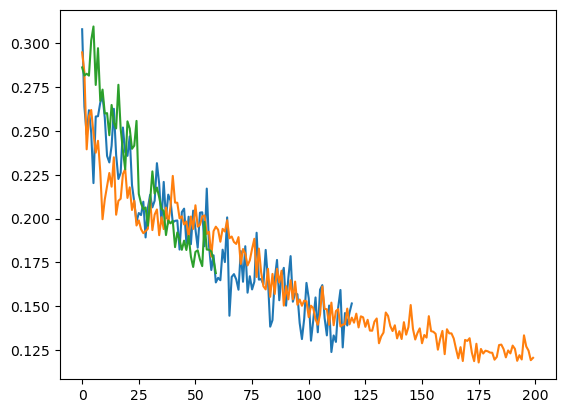

In [19]:
a_30_30_sentences = np.genfromtxt('Model Training Data/30-sentences_a-0.3_c-0.06.csv', delimiter=',')
a_30_100_sentences = np.genfromtxt('Model Training Data/100-sentences_200_epochs_a-0.3_c-0.06.csv', delimiter=',')
a_35_60_sentences = np.genfromtxt('Model Training Data/100-sentences_60_epochs_a-0.35_c-0.06.csv', delimiter=',')
plt.plot(a_30_30_sentences, label="30 sentences")
plt.plot(a_30_100_sentences, label="100 sentences" )
plt.plot(a_35_60_sentences)